In [58]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import preprocess

data = preprocess.data

# Moneyball 

"Moneyball" is based on the Oakland Athletics baseball team's 2002 season and Bill James's application of statistics to basball, Sabermetrics.

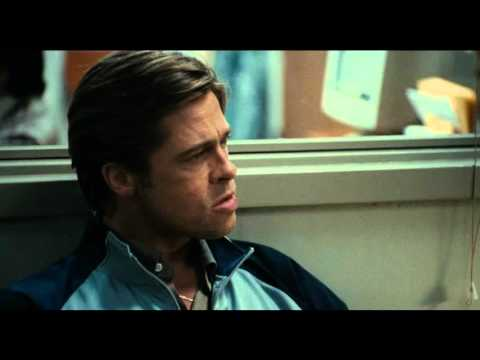

In [60]:
from IPython.display import YouTubeVideo

YouTubeVideo("KWPhV6PUr9o")

Based on the explanation given by the assistant GM Paul DePodesta (a.k.a Peter Brand played by Jonah Hill), the Oakland A's utilized the "Pythagorean Expectation Formula" to predict the number of wins they would need in order to make it to the 2002 playoffs (at least 99 games).

## Pythagorean Expectation Formula

A sports analytics forumla created by Bill James that is designed to estimate the number of wins a baseball team should win based on the number of runs they scored (RS) and allowed (RA).

In [61]:
%%latex
$$Win\,Percentage = \frac{RS^2}{RS^2 + RA^2}$$

<IPython.core.display.Latex object>

### DePodesta's prediction:

To guarantee playoffs, DePodesta predicted that the A's would need at least 99 wins. A team wins if runs scored (RS) is higher than the opposite team. Let's see if DePodesta's prediction is accurate by exploring the relationship between runs scored and wins for playoff teams and non-playoff teams. 

### Moneyball Data Table

In [62]:
data.head(3)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,162,0.315,0.403,7


In [63]:
mb_data = data[data["Year"] < 2002]

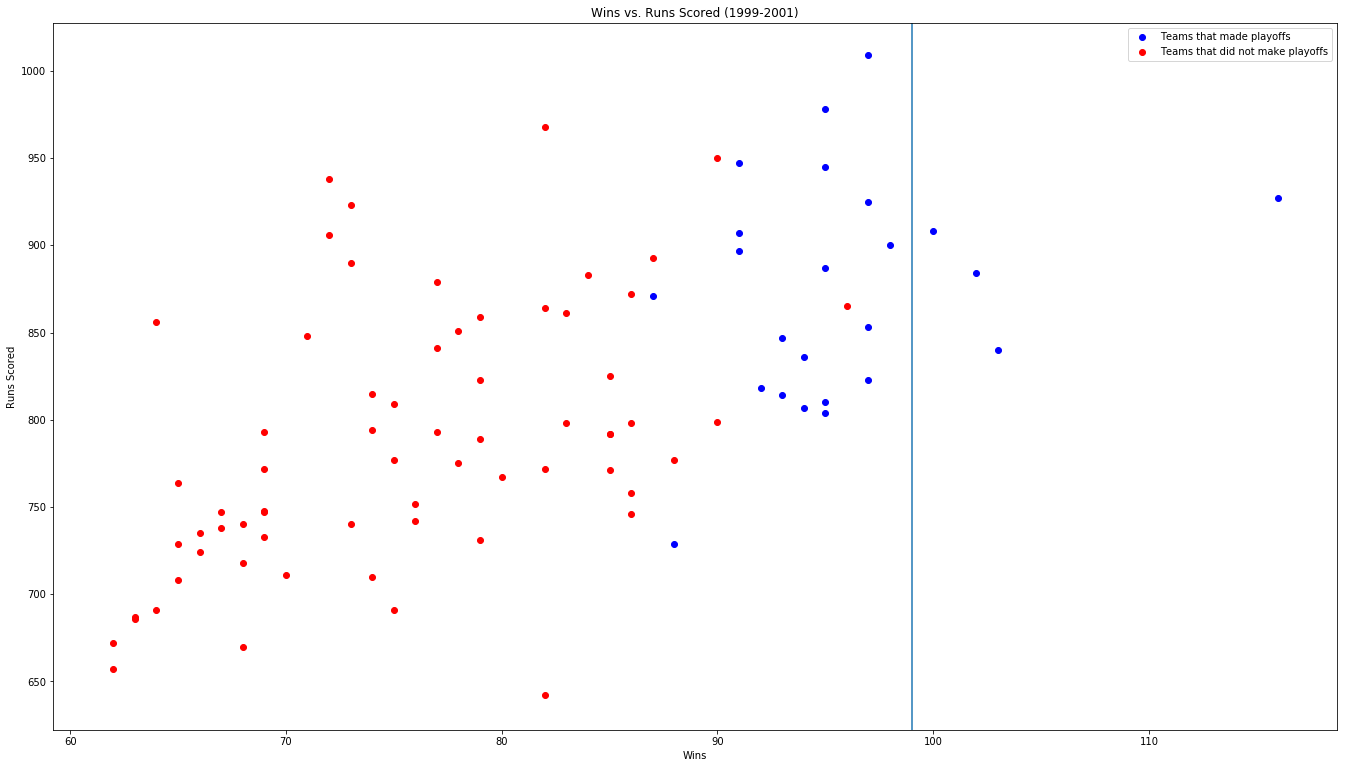

In [64]:
plt.rcParams['figure.figsize'] = (23,13)
mb_made_playoffs = mb_data[mb_data["Playoffs"]==1]
mb_no_playoffs = mb_data[mb_data["Playoffs"]==0]

plt.scatter(mb_made_playoffs["W"],mb_made_playoffs["RS"],color="blue",label="Teams that made playoffs")
plt.scatter(mb_no_playoffs["W"],mb_no_playoffs["RS"],color="red",label="Teams that did not make playoffs")
plt.axvline(x=99)
plt.title("Wins vs. Runs Scored (1999-2001)")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.legend()
plt.show()

In order to replicate DePodesta's insights pre-2002 season and due to missing data from 1965 to 1998, the data was limited between 1999 to 2001. As displayed by the graph, teams that made it to playoffs (1999-2001) had wins in the 90 to 100 region. The graph also shows a few teams that made it between the 90 to 97 win region but did not make it to playoffs. The vertical line represents DePodesta's 99 win prediction and it demonstrates that 99 wins will most likely guarantee a spot in the playoffs.

There are a total of 162 games, not including the postseason, and, therefore, the predicted win percentage for Oakland A's 2002 season would be about:

In [67]:
%%latex
$$ \frac{99\,wins}{162\,games} = 0.61 $$

<IPython.core.display.Latex object>

Then using the pythagorean expectation formula, we can figure out the number of runs scored and runs allowed to make it to the playoffs. To save time, we'll use DePodesta's findings for RS and RA:

In [65]:
%%latex
$$ \frac{(814)^2}{(814)^2+(645)^2} = 0.6143$$

<IPython.core.display.Latex object>

## Learning Outcomes for this Project

The primary goal of this project is to recreate DePodesta's findings using machine learning models. We will attempt to predict the number of wins, runs scored and runs allowed, and compare the outcome with DePodesta's predictions. Then we will compare those predictions with the actual wins, runs scored and runs allowed for the Oakland A's 2002 season.

## Sources

1. https://en.wikipedia.org/wiki/Moneyball_(film)

2. https://en.wikipedia.org/wiki/Paul_DePodesta

3. https://en.wikipedia.org/wiki/Pythagorean_expectation

4. https://en.wikipedia.org/wiki/Major_League_Baseball_schedule

5. https://www.edx.org/course/analytics-edge-mitx-15-071x-3

6. https://en.wikipedia.org/wiki/Run_differential

7. https://www.kaggle.com/wduckett/moneyball-mlb-stats-19622012/home